# Textbook Example

In [32]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib

In [33]:
X,y = shap.datasets.adult()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [34]:
cats = ['Workclass','Marital Status', 'Occupation', 'Relationship','Race','Sex','Country']
nums = ['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']

In [35]:
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(),cats),
        ('num' , StandardScaler(), nums)
    ]
)

In [36]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

In [37]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Workclass',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Education-Num',
                                                   'Capital Gain',
                                                   'Capital Loss',
                                                   'Hours per week'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [38]:
X_sub = shap.sample(X_train,100)

In [39]:
ex = shap.Explainer(model.predict_proba, X_sub)
shap_values = ex(X_test.iloc[0:100])

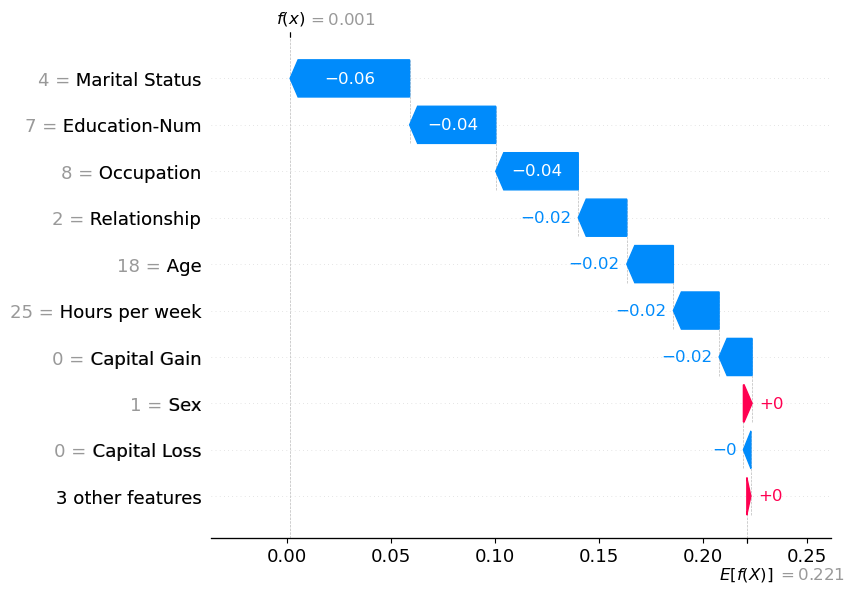

In [40]:
class_index = 1
data_index = 1
shap.plots.waterfall(shap_values[data_index,:,class_index])

# Fresh Example, own transformer

In [4]:
import pandas as pd

# Specify the file path
file_path = 'data/dummy_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the DataFrame
print(df)

   ID  AGE  GENDER  LTV
0   1   22    Male  0.5
1   2   33  Female  0.3
2   3   50    Male  0.1
3   4   70    Male  0.9
4   5   24  Female  1.0
5   6   28    Male  0.6
6   7   29  Female  0.1
7   8   30    Male  0.9
8   9   18  Female  1.0
9  10   60    Male  0.6


In [6]:
# import packages
from sklearn.base import BaseEstimator, TransformerMixin
# define the transformer
class AgeImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, age_coef, gender_coef):
        print('Initialising transformer...')
        self.age_coef = age_coef
        self.gender_coef = gender_coef
        
    def fit(self, X, y = None):
        self.mean_age = round(X['Age'].mean())
        return self
    
    def transform(self, X):
        print('replacing impossible age values')
        X.loc[(X['age'] > self.max_age) 
              |  (X['age'] < 0), 'age'] = self.mean_age
        return X

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the column transformer
ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), ['GENDER'])
    ],
    remainder='passthrough'
)

# Create the pipeline
pipeline = Pipeline([
    ('column_transformer', ct),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Simulated Example

In [41]:
from sklearn.datasets import make_classification

# Simulate a binary classification dataset
X_log, y_log = make_classification(n_samples=100, n_features=5, random_state=42)

# Print the simulated dataset
print("Simulated Dataset:")
print("X:", X_log)
print("y:", y_log)

Simulated Dataset:
X: [[-0.43066755  0.67287309 -0.72427983 -0.53963044 -0.65160035]
 [ 0.21164583 -0.84389686  0.53479393  0.82584805  0.68195297]
 [ 1.09267506  0.40910605  1.10009583 -0.94275087 -0.98150865]
 [ 1.51990078 -0.77336118  1.99805321  0.15513175 -0.3853136 ]
 [-0.45390127 -2.18347304  0.24472415  2.59123946 -0.48423407]
 [-1.46361184  0.37531604 -1.79532002  0.25415746 -1.24778318]
 [ 0.88948365  0.80742726  0.73019848 -1.28568005  0.13074058]
 [-1.11327862  1.89033108 -1.92487377 -1.5598485   0.18645431]
 [ 0.63174629 -0.88541844  1.02703224  0.68057323  0.54709738]
 [-0.88602706 -0.83311649 -0.7173148   1.31217492  0.44381943]
 [ 0.56372286 -1.47487037  1.15509316  1.35536951 -0.2176812 ]
 [-1.02754411 -0.32929388 -1.05383855  0.82600732 -0.05952536]
 [ 0.19375402 -0.96314239  0.55600276  0.96423311 -0.20219265]
 [-0.05396947  0.15985512 -0.11708689 -0.15013844  0.82541635]
 [ 0.96335953  0.65992405  0.86561977 -1.15806823  0.46210347]
 [-1.09939128 -0.47936995 -1.0832

In [42]:
import numpy as np
scale = 1 / np.max(gamma_values)
y_gamma = gamma_values * scale
y_gamma

array([0.13981491, 0.27771589, 0.23357655, 0.02947656, 0.01793922,
       0.35491711, 0.148741  , 0.05461358, 0.10862162, 0.10086966,
       0.14710616, 0.23601403, 0.10375676, 0.25349522, 0.05233625,
       0.28583859, 0.04113383, 0.12960915, 0.17583344, 0.09043705,
       0.24859884, 0.0534787 , 0.2520358 , 0.2199018 , 0.15945052,
       0.20338365, 0.06612701, 0.16719077, 0.21221742, 0.31565302,
       0.28293611, 0.03361155, 0.09084631, 0.25612295, 0.207467  ,
       0.24087046, 0.12692957, 0.13875597, 0.08546767, 0.15799859,
       0.13131052, 0.10772601, 0.09067595, 0.10692129, 0.49029884,
       0.22999699, 0.04731202, 0.08508655, 1.        , 0.013423  ])

In [43]:
import numpy as np
from scipy.stats import gamma

x_gamma = gamma.rvs(gamma_values)

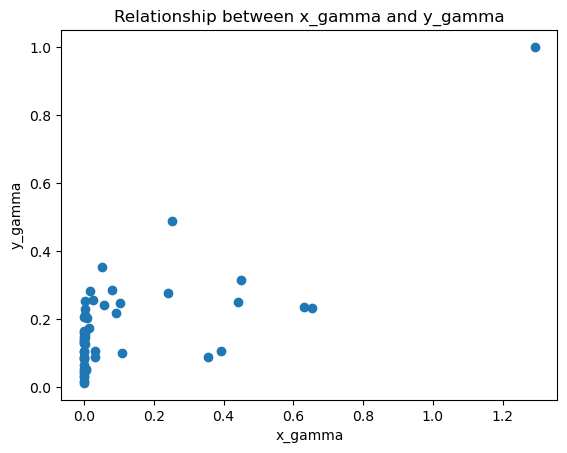

In [44]:
import matplotlib.pyplot as plt

plt.scatter(x_gamma, y_gamma)
plt.xlabel('x_gamma')
plt.ylabel('y_gamma')
plt.title('Relationship between x_gamma and y_gamma')
plt.show()

In [45]:
import numpy as np

# Create a mask for y_log equal to 0
mask = y_log == 0

# Sample values from X_gamma based on the mask
X_combined = np.concatenate((X_log, np.random.choice(x_gamma, size=(X_log.shape[0], 1))), axis=1)

# Print the combined dataset
print("Combined Dataset:")
print("X_combined:", X_combined)

Combined Dataset:
X_combined: [[-4.30667552e-01  6.72873085e-01 -7.24279827e-01 -5.39630436e-01
  -6.51600348e-01  4.91517154e-06]
 [ 2.11645831e-01 -8.43896860e-01  5.34793935e-01  8.25848048e-01
   6.81952971e-01  3.29338194e-78]
 [ 1.09267506e+00  4.09106051e-01  1.10009583e+00 -9.42750868e-01
  -9.81508651e-01  3.18019858e-06]
 [ 1.51990078e+00 -7.73361182e-01  1.99805321e+00  1.55131754e-01
  -3.85313597e-01  5.12635893e-02]
 [-4.53901271e-01 -2.18347304e+00  2.44724154e-01  2.59123946e+00
  -4.84234073e-01  4.84401141e-03]
 [-1.46361184e+00  3.75316036e-01 -1.79532002e+00  2.54157464e-01
  -1.24778318e+00  4.91517154e-06]
 [ 8.89483645e-01  8.07427260e-01  7.30198478e-01 -1.28568005e+00
   1.30740577e-01  8.44419977e-04]
 [-1.11327862e+00  1.89033108e+00 -1.92487377e+00 -1.55984850e+00
   1.86454315e-01  4.42427704e-01]
 [ 6.31746295e-01 -8.85418435e-01  1.02703224e+00  6.80573226e-01
   5.47097381e-01  5.86964389e-02]
 [-8.86027064e-01 -8.33116491e-01 -7.17314796e-01  1.31217492

In [46]:
# Create a mask for y_log equal to 1
mask = y_log == 1

# Replace the values in X_combined based on the mask
X_combined[mask, -1] = x_gamma

# Print the updated combined dataset
print("Updated Combined Dataset:")
print("X_combined:", X_combined)

Updated Combined Dataset:
X_combined: [[-4.30667552e-01  6.72873085e-01 -7.24279827e-01 -5.39630436e-01
  -6.51600348e-01  4.91517154e-06]
 [ 2.11645831e-01 -8.43896860e-01  5.34793935e-01  8.25848048e-01
   6.81952971e-01  2.46449909e-06]
 [ 1.09267506e+00  4.09106051e-01  1.10009583e+00 -9.42750868e-01
  -9.81508651e-01  3.18019858e-06]
 [ 1.51990078e+00 -7.73361182e-01  1.99805321e+00  1.55131754e-01
  -3.85313597e-01  5.12635893e-02]
 [-4.53901271e-01 -2.18347304e+00  2.44724154e-01  2.59123946e+00
  -4.84234073e-01  2.40090547e-01]
 [-1.46361184e+00  3.75316036e-01 -1.79532002e+00  2.54157464e-01
  -1.24778318e+00  6.54135484e-01]
 [ 8.89483645e-01  8.07427260e-01  7.30198478e-01 -1.28568005e+00
   1.30740577e-01  8.44419977e-04]
 [-1.11327862e+00  1.89033108e+00 -1.92487377e+00 -1.55984850e+00
   1.86454315e-01  4.42427704e-01]
 [ 6.31746295e-01 -8.85418435e-01  1.02703224e+00  6.80573226e-01
   5.47097381e-01  5.20899181e-08]
 [-8.86027064e-01 -8.33116491e-01 -7.17314796e-01  1.

In [48]:
import pandas as pd

# Convert X_combined to a DataFrame
df_combined = pd.DataFrame(X_combined)

# Assign column labels to the DataFrame
df_combined.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Print the updated DataFrame
print(df_combined)

          X1        X2        X3        X4        X5            X6
0  -0.430668  0.672873 -0.724280 -0.539630 -0.651600  4.915172e-06
1   0.211646 -0.843897  0.534794  0.825848  0.681953  2.464499e-06
2   1.092675  0.409106  1.100096 -0.942751 -0.981509  3.180199e-06
3   1.519901 -0.773361  1.998053  0.155132 -0.385314  5.126359e-02
4  -0.453901 -2.183473  0.244724  2.591239 -0.484234  2.400905e-01
..       ...       ...       ...       ...       ...           ...
95  0.735948  1.203166  0.417673 -1.648321 -0.151785  1.087071e-01
96  0.846092 -1.140526  1.359706  0.861991  0.629629  3.180199e-06
97 -0.844677  1.643195 -1.533275 -1.411759 -1.612716  1.155047e-06
98 -1.282744  0.120370 -1.500776  0.450590  2.122156  1.291989e+00
99 -0.722168 -1.128686 -0.427958  1.560704 -1.024388  3.293382e-78

[100 rows x 6 columns]


In [63]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.compose import ColumnTransformer

# Define the transformations for each column
transformations = [
    ('normalize', StandardScaler(), ['X1', 'X2']),
    ('encode', KBinsDiscretizer(n_bins=5, encode='ordinal'), ['X3', 'X4']),
    ('rank_order', FunctionTransformer(lambda x: x.rank(), validate=False), ['X5', 'X6'])
]

# Create the column transformer
ct = ColumnTransformer(transformers=transformations)
ct.fit(df_combined)

# Apply the transformations to the dataframe
X_transformed = ct.fit_transform(df_combined)

In [81]:
from sklearn.linear_model import LogisticRegression

# Select the features X1-X5
X_features = X_log[:, :5]

# Create the logistic regression model
classifier = LogisticRegression()

# Fit the model on the selected features and target variable
classifier.fit(X_features, y_log)

InvalidIndexError: (slice(None, None, None), slice(None, 5, None))

In [82]:
from sklearn.linear_model import GammaRegressor

# Create the gamma regression model
gamma_model = GammaRegressor()

# Filter the subset where y_log = 1
X_subset = X_combined[y_log == 1]

# Fit the model on X6 and y_gamma
gamma_model.fit(X_subset[:, -1].reshape(-1, 1), y_gamma)

InvalidIndexError: (slice(None, None, None), -1)

In [78]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


# Create the pipeline
model = Pipeline([
    ('preprocessor', ct ),
    ('classifier', classifier)#,
    #('gamma_model', gamma_model)
])

In [80]:
X_combined

array([[-4.30667552e-01,  6.72873085e-01, -7.24279827e-01,
        -5.39630436e-01, -6.51600348e-01,  4.91517154e-06],
       [ 2.11645831e-01, -8.43896860e-01,  5.34793935e-01,
         8.25848048e-01,  6.81952971e-01,  2.46449909e-06],
       [ 1.09267506e+00,  4.09106051e-01,  1.10009583e+00,
        -9.42750868e-01, -9.81508651e-01,  3.18019858e-06],
       [ 1.51990078e+00, -7.73361182e-01,  1.99805321e+00,
         1.55131754e-01, -3.85313597e-01,  5.12635893e-02],
       [-4.53901271e-01, -2.18347304e+00,  2.44724154e-01,
         2.59123946e+00, -4.84234073e-01,  2.40090547e-01],
       [-1.46361184e+00,  3.75316036e-01, -1.79532002e+00,
         2.54157464e-01, -1.24778318e+00,  6.54135484e-01],
       [ 8.89483645e-01,  8.07427260e-01,  7.30198478e-01,
        -1.28568005e+00,  1.30740577e-01,  8.44419977e-04],
       [-1.11327862e+00,  1.89033108e+00, -1.92487377e+00,
        -1.55984850e+00,  1.86454315e-01,  4.42427704e-01],
       [ 6.31746295e-01, -8.85418435e-01,  1.027

In [79]:
y_log_pred = model.predict(X_combined)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
# Generate example data
X_train = np.random.rand(100, 5)
y_train = np.random.randint(0, 2, size=(100,))
X_test = np.random.rand(20, 5)
y_test = np.random.randint(0, 2, size=(20,))

# Create the logistic regression model
logistic_model = LogisticRegression()

# Create the linear regression model
linear_model = LinearRegression()

# Create the pipeline
model = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Apply feature scaling
    ('logistic', logistic_model),
    ('linear', linear_model)
])

# Fit the pipeline on the training data
model.fit(X_train, y_train)

# Predict probabilities using logistic regression
logistic_probs = model.predict_proba(X_test)

# Predict using linear regression
linear_preds = model.predict(X_test)

# Multiply probabilities with predictions
combined_preds = logistic_probs[:, 1] * linear_preds

# Add combined_preds as a step in the pipeline
model.steps.append(('combined_preds', combined_preds))

# Evaluate the combined model
accuracy = model.score(X_test, y_test)


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'LogisticRegression()' (type <class 'sklearn.linear_model._logistic.LogisticRegression'>) doesn't